In [1]:
# Importação das bibliotecas necessárias para o projeto
import pandas as pd                    # Manipulação de dados
import numpy as np                     # Operações numéricas
import matplotlib.pyplot as plt        # Criação de gráficos
import seaborn as sns                  # Visualizações estatísticas
from sklearn.model_selection import train_test_split    # Divisão treino/teste
from sklearn.ensemble import RandomForestRegressor      # Modelo de regressão
from sklearn.metrics import r2_score, mean_squared_error # Métricas de avaliação
import warnings
warnings.filterwarnings('ignore')     # Ocultar avisos desnecessários

# Configurações para melhor visualização
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("Bibliotecas carregadas com sucesso!")

Bibliotecas carregadas com sucesso!


In [2]:
# Carregamento do dataset de carros usados
df = pd.read_csv('../data/used_cars.csv')

# Informações básicas sobre o dataset
print("=== INFORMAÇÕES GERAIS DO DATASET ===")
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variáveis: {df.shape[1]}")
print(f"Tamanho do arquivo: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n=== PRIMEIROS REGISTROS 5 REGISTROS ===")
df.head()

=== INFORMAÇÕES GERAIS DO DATASET ===
Número de registros: 52
Número de variáveis: 27
Tamanho do arquivo: 47.05 KB

=== PRIMEIROS REGISTROS ===


,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,link,condition,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,4,5,3,25655,https://www.autotrader.com/cars-for-sale/vehic...,NaN,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,4,5,2,15590,https://www.carvana.com/vehicle/2386932,NaN,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,4,5,3,13590,https://www.carvana.com/vehicle/2586884#vehicl...,NaN,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,4,5,2,20590,https://www.carvana.com/vehicle/2558137,NaN,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,4,5,3,16787,https://www.carfax.com/vehicle/5NPD74LF6KH413647,4.0,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


In [3]:
# Estrutura detalhada do dataset
print("=== TIPOS DE DADOS ===")
print(df.dtypes)

print("\n=== INFORMAÇÕES ESTATÍSTICAS ===")
df.info()

print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
df.describe()

=== TIPOS DE DADOS ===
id                         int64
brand                     object
model                     object
year                       int64
miles                      int64
city_mileage               int64
highway_mileage            int64
horsepower                 int64
torque                     int64
engine_capacity_litre    float64
fuel_capacity            float64
num_cylinder               int64
num_seat                   int64
num_owners                 int64
price                      int64
link                      object
condition                float64
type                      object
doors                      int64
wheel_drive                int64
engine_type               object
speed_levels             float64
front_headroom           float64
front_legroom            float64
rear_headroom            float64
rear_legroom             float64
service_records            int64
dtype: object

=== INFORMAÇÕES ESTATÍSTICAS ===
<class 'pandas.core.frame.DataFrame'>


,id,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,condition,doors,wheel_drive,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,1.0,52.0,52.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,31.365385,2018.673077,33901.250000,29.038462,37.423077,176.865385,177.923077,1.832692,14.232692,4.038462,5.0,1.346154,21763.423077,4.0,4.0,2.153846,6.313725,38.680769,42.467308,37.238462,37.632692,7.326923
std,15.378912,1.396370,22700.646139,5.947356,4.136619,33.793507,47.256433,0.379743,2.603973,0.277350,0.0,0.622601,3532.455322,NaN,0.0,0.538138,0.761320,0.919087,1.045198,0.444202,1.604249,4.714272
min,3.000000,2014.000000,5000.000000,17.000000,24.000000,143.000000,99.000000,1.400000,7.000000,4.000000,5.0,1.000000,13590.000000,4.0,4.0,2.000000,6.000000,37.500000,41.100000,35.800000,33.200000,1.000000
25%,18.750000,2018.000000,16454.750000,26.500000,35.750000,152.000000,138.000000,1.500000,12.400000,4.000000,5.0,1.000000,19519.000000,4.0,4.0,2.000000,6.000000,37.725000,42.200000,37.075000,37.175000,4.000000
50%,31.500000,2019.000000,27448.500000,30.000000,38.000000,159.500000,181.000000,2.000000,13.600000,4.000000,5.0,1.000000,21998.500000,4.0,4.0,2.000000,6.000000,38.500000,42.300000,37.200000,37.400000,6.000000
75%,44.250000,2019.250000,42442.000000,30.000000,40.000000,192.000000,192.000000,2.000000,15.050000,4.000000,5.0,2.000000,22996.000000,4.0,4.0,2.000000,6.000000,39.300000,42.400000,37.500000,38.300000,10.000000
max,57.000000,2022.000000,97027.000000,55.000000,49.000000,288.000000,294.000000,3.500000,19.000000,6.000000,5.0,3.000000,33777.000000,4.0,4.0,4.000000,9.000000,40.400000,45.500000,38.000000,40.400000,26.000000


In [4]:
# Análise mais detalhada das variáveis importantes
print("=== ANÁLISE DAS VARIÁVEIS PRINCIPAIS ===")

# Verificar a variável target (preço)
print("PREÇOS:")
print(f"Preço mínimo: ${df['price'].min():,.0f}")
print(f"Preço máximo: ${df['price'].max():,.0f}")
print(f"Preço médio: ${df['price'].mean():,.0f}")
print(f"Preço mediano: ${df['price'].median():,.0f}")

# Verificar distribuição das marcas
print("\nDISTRIBUIÇÃO DAS MARCAS:")
print(df['brand'].value_counts())

# Verificar anos dos carros
print(f"\nANOS DOS CARROS:")
print(f"Ano mais antigo: {df['year'].min()}")
print(f"Ano mais recente: {df['year'].max()}")

=== ANÁLISE DAS VARIÁVEIS PRINCIPAIS ===
PREÇOS:
Preço mínimo: $13,590
Preço máximo: $33,777
Preço médio: $21,763
Preço mediano: $21,998

DISTRIBUIÇÃO DAS MARCAS:
brand
Honda         23
Volkswagen    11
Hyundai        7
Ford           5
Chevrolet      3
Subaru         3
Name: count, dtype: int64

ANOS DOS CARROS:
Ano mais antigo: 2014
Ano mais recente: 2022


In [21]:
# Criação de novas variáveis úteis
df_clean = df.copy()

# Criar variável idade do carro
df_clean['idade_carro'] = 2025 - df_clean['year']

# Criar variável quilometragem por ano
df_clean['km_por_ano'] = df_clean['miles'] / df_clean['idade_carro']
df_clean['km_por_ano'] = df_clean['km_por_ano'].replace([np.inf, -np.inf], np.nan)

# Criar categorias de preço
df_clean['faixa_preco'] = pd.cut(df_clean['price'], 
                                bins=[0, 15000, 20000, 25000, np.inf],
                                labels=['Baixo', 'Medio', 'Alto', 'Premium'])

print("Novas variáveis criadas:")
print("- idade_carro: idade em anos")
print("- km_por_ano: quilometragem média anual") 
print("- faixa_preco: categorização dos preços")

Novas variáveis criadas:
- idade_carro: idade em anos
- km_por_ano: quilometragem média anual
- faixa_preco: categorização dos preços


In [6]:
# Tratamento de valores ausentes e inconsistentes
print("=== TRATAMENTO DE DADOS FALTANTES ===")

# Verificar quais colunas têm dados faltantes
colunas_com_nulos = df_clean.columns[df_clean.isnull().any()].tolist()
print(f"Colunas com valores nulos: {colunas_com_nulos}")

# Para este projeto, vamos remover linhas com valores nulos na variável target
df_clean = df_clean.dropna(subset=['price'])

# Tratar valores nulos em outras variáveis importantes
if 'condition' in colunas_com_nulos:
    df_clean['condition'] = df_clean['condition'].fillna('Unknown')

print(f"Dataset após limpeza: {df_clean.shape[0]} registros")
print(f"Registros removidos: {df.shape[0] - df_clean.shape[0]}")

=== TRATAMENTO DE DADOS FALTANTES ===
Colunas com valores nulos: ['condition', 'speed_levels']
Dataset após limpeza: 52 registros
Registros removidos: 0


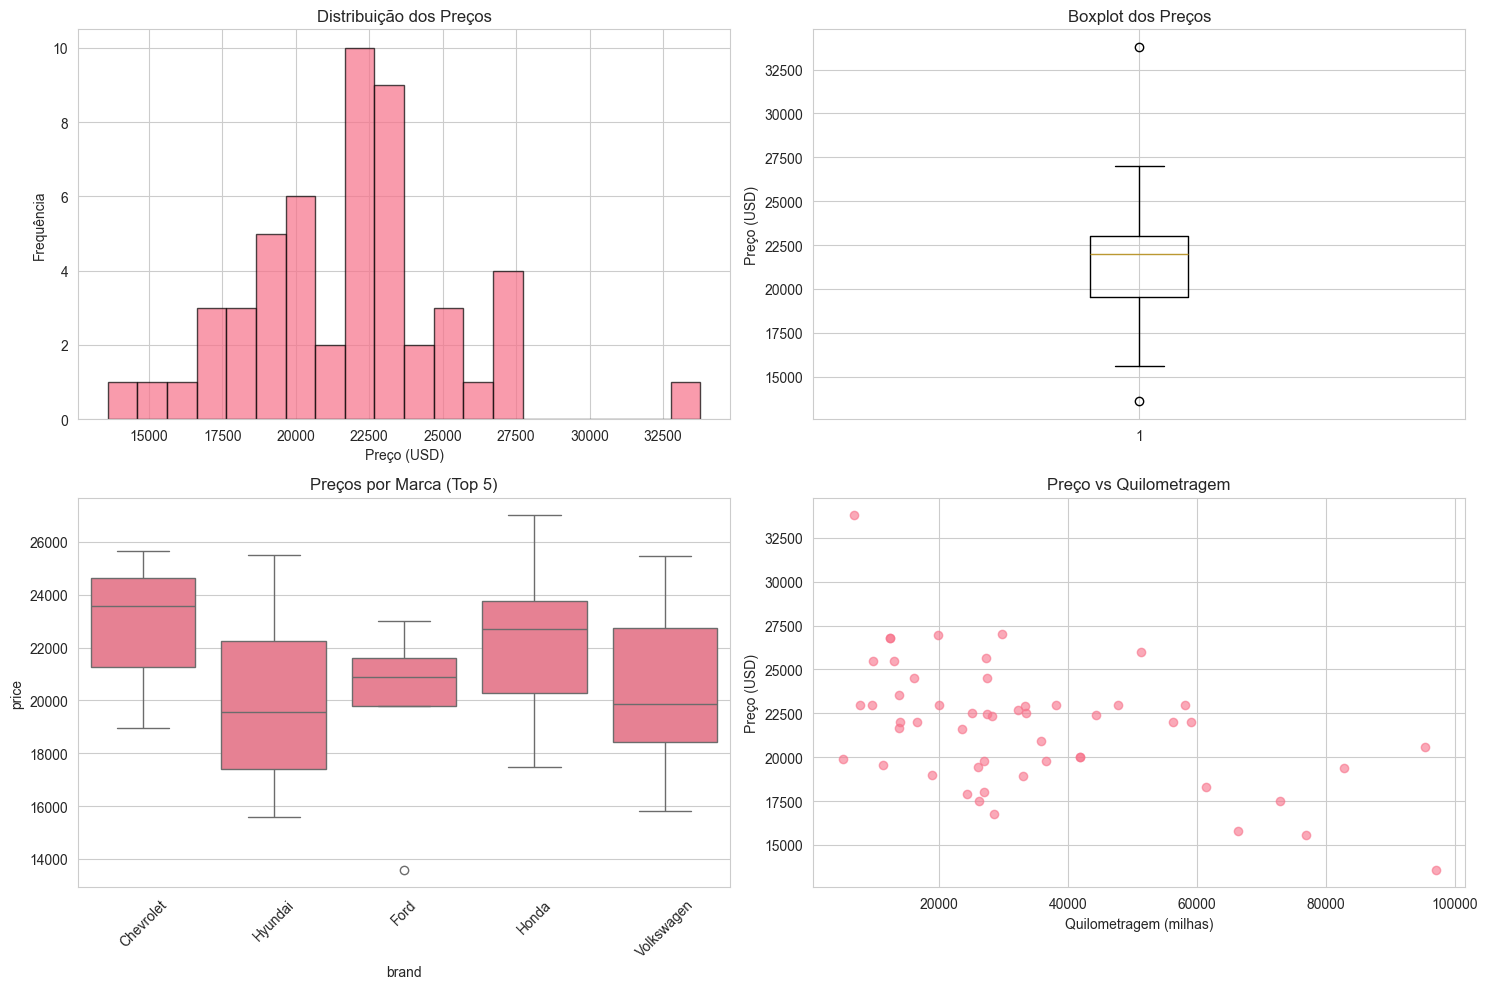

In [7]:
# Configuração do estilo dos gráficos
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

# Análise da variável target (preço)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma dos preços
axes[0,0].hist(df_clean['price'], bins=20, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribuição dos Preços')
axes[0,0].set_xlabel('Preço (USD)')
axes[0,0].set_ylabel('Frequência')

# Boxplot dos preços
axes[0,1].boxplot(df_clean['price'])
axes[0,1].set_title('Boxplot dos Preços')
axes[0,1].set_ylabel('Preço (USD)')

# Preços por marca (top 5)
top_brands = df_clean['brand'].value_counts().head(5).index
df_top_brands = df_clean[df_clean['brand'].isin(top_brands)]
sns.boxplot(data=df_top_brands, x='brand', y='price', ax=axes[1,0])
axes[1,0].set_title('Preços por Marca (Top 5)')
axes[1,0].tick_params(axis='x', rotation=45)

# Relação preço vs quilometragem
axes[1,1].scatter(df_clean['miles'], df_clean['price'], alpha=0.6)
axes[1,1].set_title('Preço vs Quilometragem')
axes[1,1].set_xlabel('Quilometragem (milhas)')
axes[1,1].set_ylabel('Preço (USD)')

plt.tight_layout()
plt.savefig('../img/analise_precos.png', dpi=300, bbox_inches='tight')
plt.show()

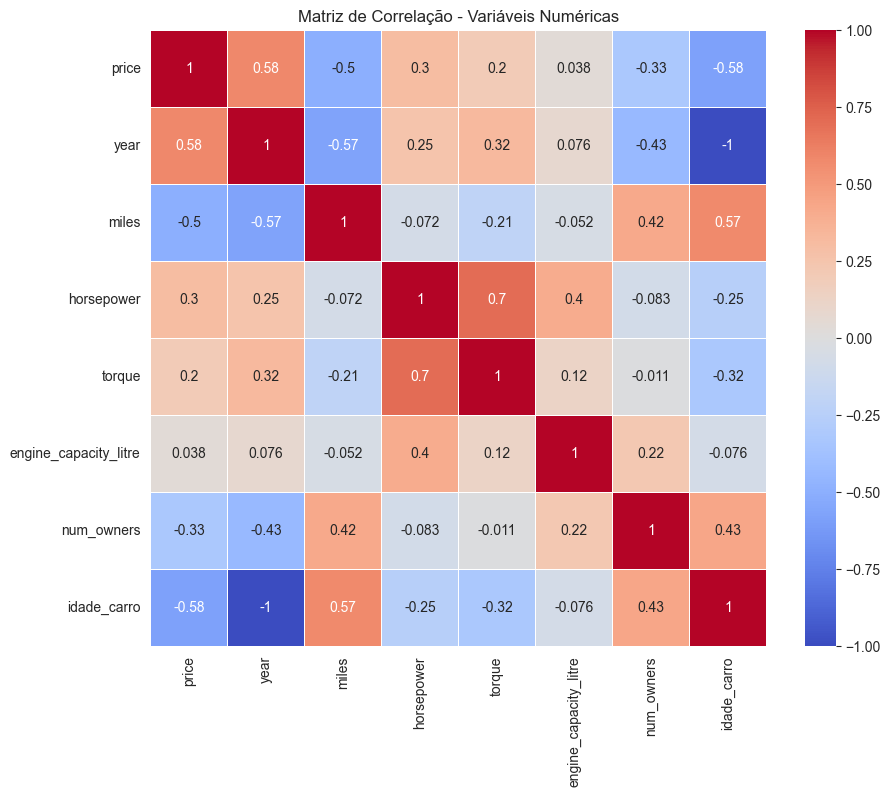

=== CORRELAÇÕES COM O PREÇO ===
price                    1.000000
year                     0.581254
horsepower               0.301800
torque                   0.199764
engine_capacity_litre    0.038197
num_owners              -0.327853
miles                   -0.500769
idade_carro             -0.581254
Name: price, dtype: float64


In [8]:
# Análise de correlações entre variáveis numéricas
# Selecionar apenas variáveis numéricas relevantes
numeric_cols = ['price', 'year', 'miles', 'horsepower', 'torque', 
                'engine_capacity_litre', 'num_owners', 'idade_carro']

# Verificar quais colunas existem no dataset
existing_cols = [col for col in numeric_cols if col in df_clean.columns]

# Matriz de correlação
correlation_matrix = df_clean[existing_cols].corr()

# Gráfico de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.savefig('../img/correlacao_matriz.png', dpi=300, bbox_inches='tight')
plt.show()

# Mostrar correlações com o preço
print("=== CORRELAÇÕES COM O PREÇO ===")
price_corr = correlation_matrix['price'].sort_values(ascending=False)
print(price_corr)

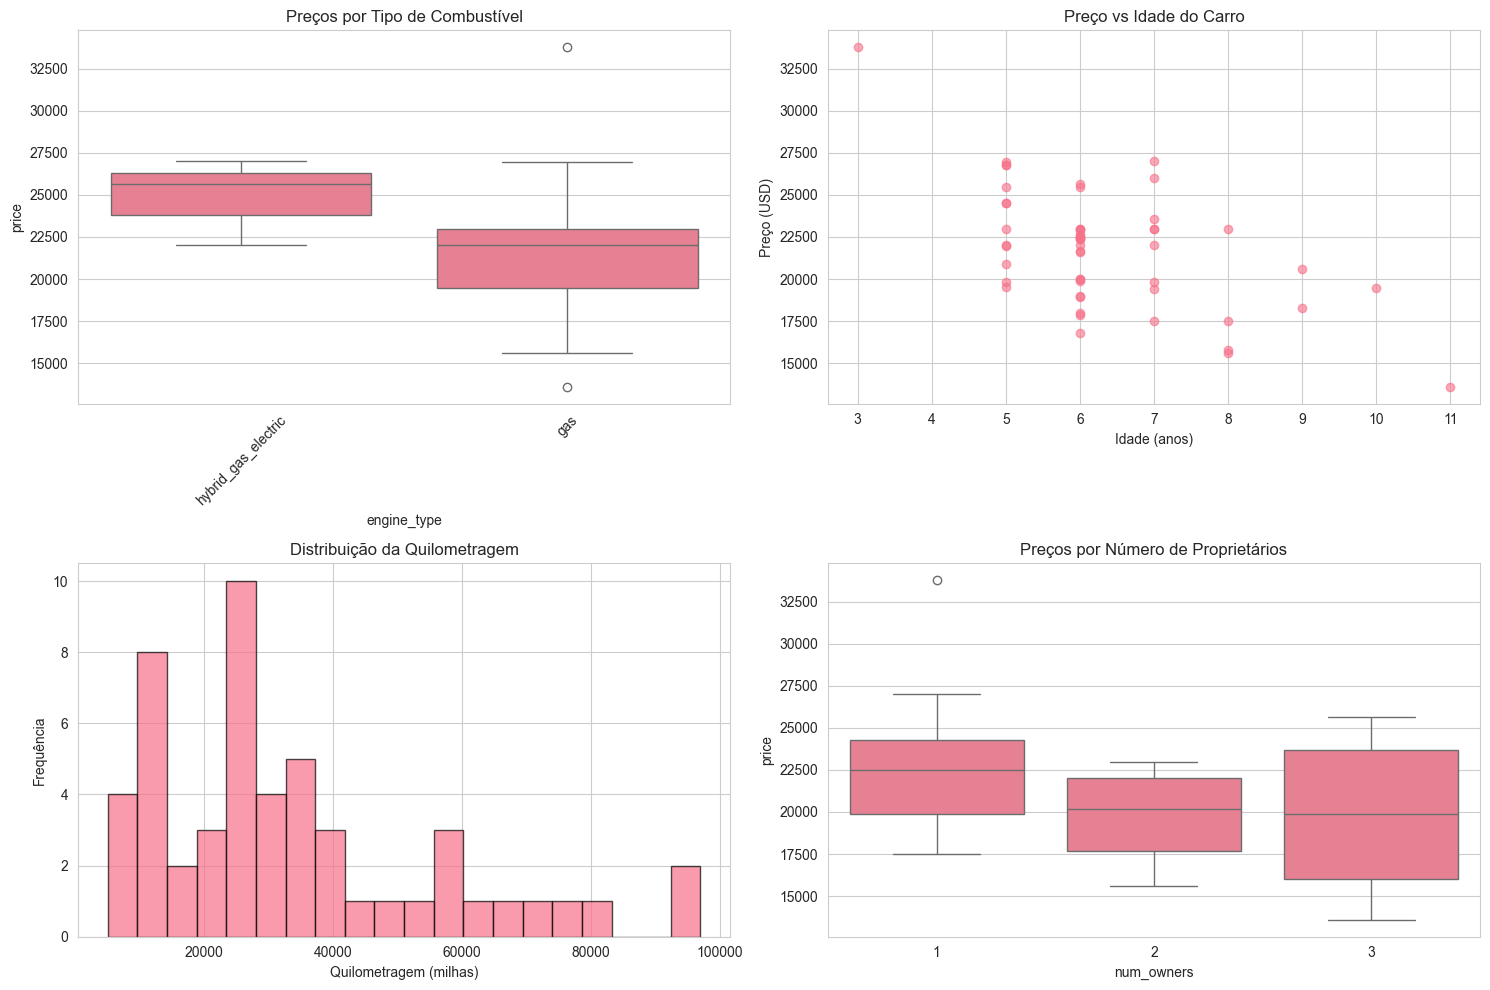

In [9]:
# Análise por categorias importantes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Preços por tipo de combustível
if 'engine_type' in df_clean.columns:
    engine_counts = df_clean['engine_type'].value_counts()
    if len(engine_counts) > 1:
        sns.boxplot(data=df_clean, x='engine_type', y='price', ax=axes[0,0])
        axes[0,0].set_title('Preços por Tipo de Combustível')
        axes[0,0].tick_params(axis='x', rotation=45)

# Preços por idade do carro
axes[0,1].scatter(df_clean['idade_carro'], df_clean['price'], alpha=0.6)
axes[0,1].set_title('Preço vs Idade do Carro')
axes[0,1].set_xlabel('Idade (anos)')
axes[0,1].set_ylabel('Preço (USD)')

# Distribuição da quilometragem
axes[1,0].hist(df_clean['miles'], bins=20, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Distribuição da Quilometragem')
axes[1,0].set_xlabel('Quilometragem (milhas)')
axes[1,0].set_ylabel('Frequência')

# Preços por número de proprietários
if 'num_owners' in df_clean.columns:
    sns.boxplot(data=df_clean, x='num_owners', y='price', ax=axes[1,1])
    axes[1,1].set_title('Preços por Número de Proprietários')

plt.tight_layout()
plt.savefig('../img/analise_categorias.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Seleção e preparação das variáveis para o modelo
print("=== PREPARAÇÃO DOS DADOS PARA MODELAGEM ===")

# Selecionar variáveis preditoras (features)
# Variáveis numéricas importantes
numeric_features = ['year', 'miles', 'horsepower', 'torque', 'engine_capacity_litre', 
                   'num_owners', 'idade_carro']

# Verificar quais existem no dataset
numeric_features = [col for col in numeric_features if col in df_clean.columns]

# Variáveis categóricas importantes
categorical_features = ['brand', 'engine_type']
categorical_features = [col for col in categorical_features if col in df_clean.columns]

print(f"Variáveis numéricas selecionadas: {numeric_features}")
print(f"Variáveis categóricas selecionadas: {categorical_features}")

# Criar dataset para modelagem
df_model = df_clean.copy()

# Remover linhas com valores nulos nas variáveis selecionadas
all_features = numeric_features + categorical_features + ['price']
df_model = df_model[all_features].dropna()

print(f"Dataset para modelagem: {df_model.shape[0]} registros")

=== PREPARAÇÃO DOS DADOS PARA MODELAGEM ===
Variáveis numéricas selecionadas: ['year', 'miles', 'horsepower', 'torque', 'engine_capacity_litre', 'num_owners', 'idade_carro']
Variáveis categóricas selecionadas: ['brand', 'engine_type']
Dataset para modelagem: 52 registros


In [11]:
# Codificação das variáveis categóricas
from sklearn.preprocessing import LabelEncoder

df_encoded = df_model.copy()

# Aplicar Label Encoding para variáveis categóricas
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    
    # Mostrar o mapeamento
    print(f"\nMapeamento para {col}:")
    for i, label in enumerate(le.classes_):
        print(f"  {label} -> {i}")

# Criar lista final de features
final_features = numeric_features + [col + '_encoded' for col in categorical_features]
print(f"\nFeatures finais para o modelo: {final_features}")


Mapeamento para brand:
  Chevrolet -> 0
  Ford -> 1
  Honda -> 2
  Hyundai -> 3
  Subaru -> 4
  Volkswagen -> 5

Mapeamento para engine_type:
  gas -> 0
  hybrid_gas_electric -> 1

Features finais para o modelo: ['year', 'miles', 'horsepower', 'torque', 'engine_capacity_litre', 'num_owners', 'idade_carro', 'brand_encoded', 'engine_type_encoded']


In [12]:
# Separação dos dados em treino e teste
X = df_encoded[final_features]
y = df_encoded['price']

print(f"Variáveis preditoras (X): {X.shape}")
print(f"Variável target (y): {y.shape}")

# Divisão treino/teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nDados de treino: {X_train.shape[0]} registros")
print(f"Dados de teste: {X_test.shape[0]} registros")

# Verificar se não há valores nulos
print(f"\nValores nulos em X_train: {X_train.isnull().sum().sum()}")
print(f"Valores nulos em y_train: {y_train.isnull().sum()}")

Variáveis preditoras (X): (52, 9)
Variável target (y): (52,)

Dados de treino: 41 registros
Dados de teste: 11 registros

Valores nulos em X_train: 0
Valores nulos em y_train: 0


In [13]:
# Treinamento do modelo Random Forest
print("=== TREINAMENTO DO MODELO ===")

# Inicializar o modelo
modelo = RandomForestRegressor(
    n_estimators=100,      # Número de árvores
    random_state=42,       # Para reprodutibilidade
    max_depth=10,          # Profundidade máxima das árvores
    min_samples_split=5    # Mínimo de amostras para dividir
)

# Treinar o modelo
modelo.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

# Fazer previsões
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

print("Previsões realizadas!")

=== TREINAMENTO DO MODELO ===
Modelo treinado com sucesso!
Previsões realizadas!


In [22]:
# Avaliação do modelo
from sklearn.metrics import mean_absolute_error

print("=== AVALIAÇÃO DO MODELO ===")

# Métricas para dados de treino
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)

# Métricas para dados de teste
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)

print("RESULTADOS NO CONJUNTO DE TREINO:")
print(f"  R² Score: {r2_train:.4f}")
print(f"  RMSE: ${rmse_train:,.0f}")
print(f"  MAE: ${mae_train:,.0f}")

print("\nRESULTADOS NO CONJUNTO DE TESTE:")
print(f"  R² Score: {r2_test:.4f}")
print(f"  RMSE: ${rmse_test:,.0f}")
print(f"  MAE: ${mae_test:,.0f}")

# Interpretação do R²
print(f"\nINTERPRETAÇÃO:")
print(f"O modelo explica {r2_test*100:.1f}% da variação dos preços")
print(f"Erro médio absoluto: ${mae_test:,.0f}")

=== AVALIAÇÃO DO MODELO ===
RESULTADOS NO CONJUNTO DE TREINO:
  R² Score: 0.8707
  RMSE: $1,341
  MAE: $1,047

RESULTADOS NO CONJUNTO DE TESTE:
  R² Score: 0.0058
  RMSE: $2,453
  MAE: $2,154

INTERPRETAÇÃO:
O modelo explica 0.6% da variação dos preços
Erro médio absoluto: $2,154


In [15]:
# Salvar o modelo treinado
import joblib
import os

# Criar diretório models se não existir
os.makedirs('../models', exist_ok=True)

# Salvar o modelo
joblib.dump(modelo, '../models/modelo_precos_carros.pkl')

# Salvar também os label encoders (importantes para usar o modelo depois)
joblib.dump(label_encoders, '../models/label_encoders.pkl')

# Salvar informações sobre as features usadas
features_info = {
    'numeric_features': numeric_features,
    'categorical_features': categorical_features,
    'final_features': final_features,
    'model_performance': {
        'r2_score': r2_test,
        'rmse': rmse_test,
        'mae': mae_test
    }
}

joblib.dump(features_info, '../models/features_info.pkl')

print("Modelo e arquivos auxiliares salvos em ../models/:")
print("- modelo_precos_carros.pkl (modelo treinado)")
print("- label_encoders.pkl (codificadores)")
print("- features_info.pkl (informações das variáveis)")

Modelo e arquivos auxiliares salvos em ../models/:
- modelo_precos_carros.pkl (modelo treinado)
- label_encoders.pkl (codificadores)
- features_info.pkl (informações das variáveis)


In [17]:
# Teste: carregando o modelo salvo (para verificar se funcionou)
print("=== TESTE DE CARREGAMENTO DO MODELO ===")

# Carregar modelo
modelo_carregado = joblib.load('../models/modelo_precos_carros.pkl')

# Fazer uma previsão teste
previsao_teste = modelo_carregado.predict(X_test[:1])
valor_real = y_test.iloc[0]

print(f"Teste do modelo carregado:")
print(f"Valor real: ${valor_real:,.0f}")
print(f"Valor previsto: ${previsao_teste[0]:,.0f}")
print(f"Diferença: ${abs(valor_real - previsao_teste[0]):,.0f}")

=== TESTE DE CARREGAMENTO DO MODELO ===
Teste do modelo carregado:
Valor real: $17,880
Valor previsto: $20,955
Diferença: $3,075


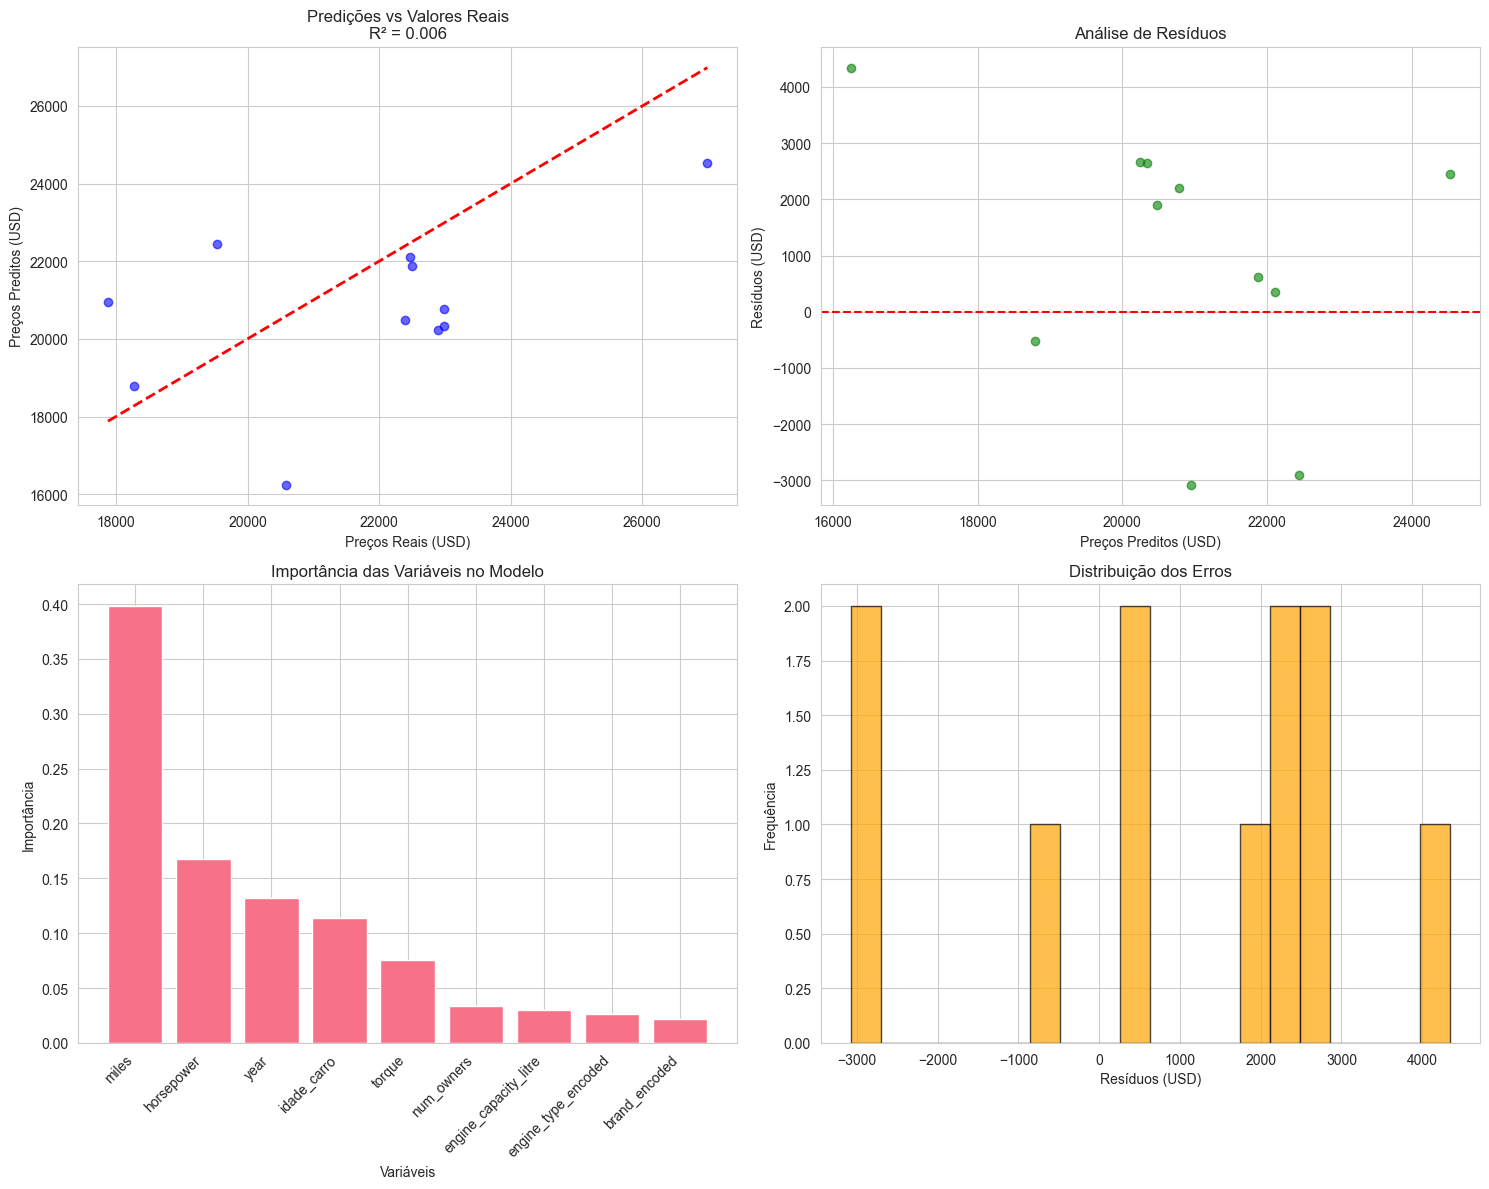

In [18]:
# Visualizações dos resultados do modelo
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Gráfico de dispersão: Valores Reais vs Preditos
axes[0,0].scatter(y_test, y_pred_test, alpha=0.6, color='blue')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Preços Reais (USD)')
axes[0,0].set_ylabel('Preços Preditos (USD)')
axes[0,0].set_title(f'Predições vs Valores Reais\nR² = {r2_test:.3f}')

# 2. Resíduos (diferenças entre real e predito)
residuos = y_test - y_pred_test
axes[0,1].scatter(y_pred_test, residuos, alpha=0.6, color='green')
axes[0,1].axhline(y=0, color='red', linestyle='--')
axes[0,1].set_xlabel('Preços Preditos (USD)')
axes[0,1].set_ylabel('Resíduos (USD)')
axes[0,1].set_title('Análise de Resíduos')

# 3. Importância das variáveis
importancias = modelo.feature_importances_
indices = np.argsort(importancias)[::-1]

axes[1,0].bar(range(len(importancias)), importancias[indices])
axes[1,0].set_xlabel('Variáveis')
axes[1,0].set_ylabel('Importância')
axes[1,0].set_title('Importância das Variáveis no Modelo')
axes[1,0].set_xticks(range(len(importancias)))
axes[1,0].set_xticklabels([final_features[i] for i in indices], rotation=45, ha='right')

# 4. Distribuição dos erros
axes[1,1].hist(residuos, bins=20, edgecolor='black', alpha=0.7, color='orange')
axes[1,1].set_xlabel('Resíduos (USD)')
axes[1,1].set_ylabel('Frequência')
axes[1,1].set_title('Distribuição dos Erros')

plt.tight_layout()
plt.savefig('../img/resultados_modelo.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
# Criar alguns exemplos de predição para demonstração
print("=== EXEMPLOS DE PREDIÇÕES ===")

# Pegar alguns carros reais para demonstrar
exemplos = X_test.head(10)
previsoes_exemplos = modelo.predict(exemplos)
reais_exemplos = y_test.head(10)

print("Comparação de 5 carros do conjunto de teste:")
print("-" * 50)

for i in range(10):
    real = reais_exemplos.iloc[i]
    pred = previsoes_exemplos[i]
    erro = abs(real - pred)
    
    print(f"Carro {i+1}:")
    print(f"  Preço Real: ${real:,.0f}")
    print(f"  Preço Predito: ${pred:,.0f}")
    print(f"  Erro: ${erro:,.0f}")
    print(f"  Erro %: {(erro/real)*100:.1f}%")
    print()

=== EXEMPLOS DE PREDIÇÕES ===
Comparação de 5 carros do conjunto de teste:
--------------------------------------------------
Carro 1:
  Preço Real: $17,880
  Preço Predito: $20,955
  Erro: $3,075
  Erro %: 17.2%

Carro 2:
  Preço Real: $22,476
  Preço Predito: $22,117
  Erro: $359
  Erro %: 1.6%

Carro 3:
  Preço Real: $22,493
  Preço Predito: $21,872
  Erro: $621
  Erro %: 2.8%

Carro 4:
  Preço Real: $22,988
  Preço Predito: $20,779
  Erro: $2,209
  Erro %: 9.6%

Carro 5:
  Preço Real: $22,988
  Preço Predito: $20,338
  Erro: $2,650
  Erro %: 11.5%

Carro 6:
  Preço Real: $18,277
  Preço Predito: $18,791
  Erro: $514
  Erro %: 2.8%

Carro 7:
  Preço Real: $22,899
  Preço Predito: $20,241
  Erro: $2,658
  Erro %: 11.6%

Carro 8:
  Preço Real: $19,542
  Preço Predito: $22,447
  Erro: $2,905
  Erro %: 14.9%

Carro 9:
  Preço Real: $20,590
  Preço Predito: $16,246
  Erro: $4,344
  Erro %: 21.1%

Carro 10:
  Preço Real: $22,388
  Preço Predito: $20,481
  Erro: $1,907
  Erro %: 8.5%

